In [1]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.1], [6.3], [4.8], 
                    [9.7], [6.2], [7.9], [2.7], [7.2], 
                    [10.1], [5.3], [7.7], [3.1]])

y_train = np.array([[1.7], [1.9], [2.09], [2.1], [1.9], [1.3], 
                    [3.3], [2.5], [2.5], [1.1], [2.7], 
                    [3.4], [1.5], [2.4], [1.3]])

#텐서화
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)

print(type(x_train_tensor))

<class 'torch.Tensor'>


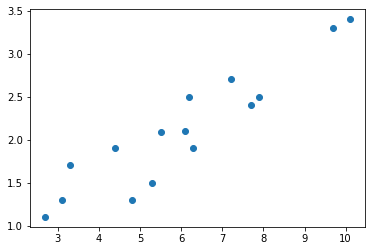

In [3]:
plt.figure()
plt.scatter(x_train, y_train)
plt.show()

# HyperParameter



> $$ Wnew = Wold - \alpha \nabla W $$





> $$ H(x) = Wx + b $$


In [8]:
input_size = 1 # sample 수 의미 x
output_size = 1
num_epochs = 50 # 학습횟수 # 보통 loss 값을 보면서 정함
learning_rate = 0.01 # 보통 0~1 사이의 값

# Model

In [9]:
model = torch.nn.Linear(input_size, output_size)


> $$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$




# Loss Function, Optimizer 정의

In [10]:
criterion = torch.nn.MSELoss() # 손실함수에 대한 정의 # error 값이 작아지는 방향으로
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # weight 값 업데이트를 시켜주는 방법

# Training

- requires_grad=False: default 값. 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가 없음을 나타냄

- requires_grad=True: 역정파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가 있음을 나타냄

- 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y 계산

- **역전파 단계에서는 출력에 대한 손실(loss)의 변화도(gradient)를 갖는 텐서를 받고, 입력에 대한 손실의 변화도를 계산**

- **loss.backward()**: 역전파 단계 계산. 이는 requires_grad=True를 갖는 모든 텐서들에 대한 손실의 변화도를 계산

- **optimzer.step()**: 경사하강법을 사용하여 가중치 갱신

In [14]:
for epoch in range(num_epochs):
 
  #모델링
  optimizer.zero_grad() #역전파 단계를 실행하기 전에 gradient(변화도) 값 초기화

  outputs = model(x_train_tensor)

  loss = criterion(outputs, y_train_tensor)

  # 학습
  # 역전파 단계: 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도 계산
  # 내부적으로 각 Module의 매개변수는 requires_grad=True일 때 텐서에 저장
  loss.backward() # gradient 값 구하는 부분 # 모델의 모든 학습 가능한 매개변수의 변화도 계산
  optimizer.step() # 구한 gradient를 구한 바탕으로 weight 값 update # 경사하강법을 사용하여 가중치 갱신

  #Loss 확인하기 # 수렴할 때까지 학습시켜야 함
  # 2의 배수 epoch마다 update
  if (epoch+1)%2==0:
    print(f'Epoch : {epoch+1}, Loss: {loss.item(): .2f}')

Epoch : 2, Loss:  0.16
Epoch : 4, Loss:  0.16
Epoch : 6, Loss:  0.16
Epoch : 8, Loss:  0.16
Epoch : 10, Loss:  0.16
Epoch : 12, Loss:  0.16
Epoch : 14, Loss:  0.16
Epoch : 16, Loss:  0.16
Epoch : 18, Loss:  0.15
Epoch : 20, Loss:  0.15
Epoch : 22, Loss:  0.15
Epoch : 24, Loss:  0.15
Epoch : 26, Loss:  0.15
Epoch : 28, Loss:  0.15
Epoch : 30, Loss:  0.15
Epoch : 32, Loss:  0.15
Epoch : 34, Loss:  0.15
Epoch : 36, Loss:  0.15
Epoch : 38, Loss:  0.15
Epoch : 40, Loss:  0.15
Epoch : 42, Loss:  0.15
Epoch : 44, Loss:  0.14
Epoch : 46, Loss:  0.14
Epoch : 48, Loss:  0.14
Epoch : 50, Loss:  0.14


- loss값이 커지는 경우, 학습률이 큰 경우 -> 발산
- loss값을 통해, hyperparameter 조정

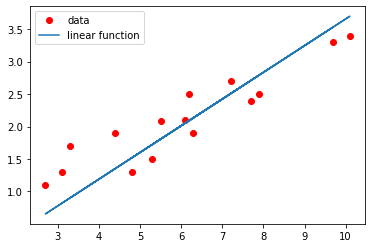

In [15]:
x_train_plot = torch.FloatTensor(x_train)
predicted = model(x_train_plot).detach().numpy() #tensor를 numpy로 변환

plt.figure()
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x_train, predicted, label='linear function')
plt.legend(loc='upper left')
plt.show()

- pytorch를 사용하다보면, module를 통해 나온 tensor를 후처리에 사용하거나, 계산된 loss tensor를 logging 하는일이 많음.
  - ***numpy 혹은 list로의 변환***

- GPU 메모리에 올려져 있는 tensor를 numpy로 변환하기 위해서는 우선 cpu 메모리로 옮겨야 함.
  - 따라서, .numpy()를 실행하기 전에 .cpu() 실행

- gradient가 계산될 경우, tensor의 경우 graph로 기록되어 있음.

- .cpu().detach()를 수행하게 되면, cpu를 만드는 edge가 생성. 하지만 곧 없어짐

- .detach().cpu()의 경우, 이 작업을 수행하지 않기 때문에 주로 .detach().cpu() 사용

- **.detach().cpu().numpy()** 사용하기

# Check

In [16]:
model.state_dict()

OrderedDict([('weight', tensor([[0.4112]])), ('bias', tensor([-0.4556]))])

- 기울기: 0.4112
- 절편: -0.4556

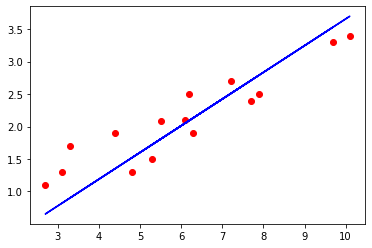

In [17]:
check_y = 0.4112*x_train - 0.4556

plt.figure()
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x_train, check_y, 'b-', label='predict')
plt.show()